# Question 1


We need to use the following update equation which was derived in the project instructions. 


$$e^{\Omega(\omega)\theta}=cos(\|\omega\|\theta)\bold{I_4} + sin(\|\omega\|\theta)\frac{\Omega(\omega)} {\|\omega\|}$$


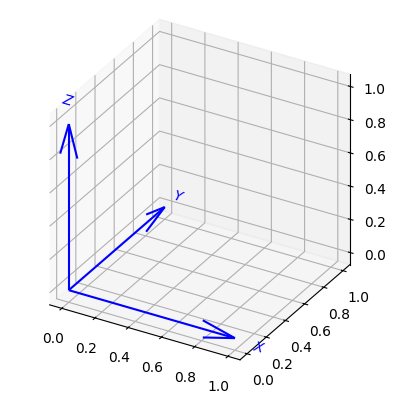

In [41]:
import spatialmath as sm
from spatialmath.base import *
import numpy as np
import matplotlib.pyplot as plt
from time import sleep


def plot_coordinate_frame_from_quaternion(input: sm.UnitQuaternion):
    """
    Uses matplotlib to plot a moving coordinate frame against the original one in 3D in real time.

    Parameters:
    - input (sm.UnitQuaternion): The quaternion representing the orientation of the moving coordinate frame.

    Returns:
    - None
    """

    plt.ion()
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the original coordinate frame
    origin = np.array([0, 0, 0])
    x_axis = np.array([1, 0, 0])
    y_axis = np.array([0, 1, 0])
    z_axis = np.array([0, 0, 1])

    # Plot the original coordinate frame
    ax.quiver(*origin, *x_axis, color='r', label='Original X-axis')
    ax.quiver(*origin, *y_axis, color='g', label='Original Y-axis')
    ax.quiver(*origin, *z_axis, color='b', label='Original Z-axis')

    # Transform the coordinate frame using the quaternion
    rotation_matrix = input.R
    transformed_x = rotation_matrix @ x_axis
    transformed_y = rotation_matrix @ y_axis
    transformed_z = rotation_matrix @ z_axis

    # Plot the transformed coordinate frame
    ax.quiver(*origin, *transformed_x, color='m', label='Transformed X-axis')
    ax.quiver(*origin, *transformed_y, color='y', label='Transformed Y-axis')
    ax.quiver(*origin, *transformed_z, color='c', label='Transformed Z-axis')

    # Set plot limits and labels
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()




def updateQuaternion(original: sm.UnitQuaternion, bodyAngularVelocity: np.ndarray, deltaT: float) -> sm.UnitQuaternion:
    """
    Update the quaternion representing the orientation of a body given its angular velocity.

    This function computes the change in the body's orientation based on the given body angular velocity and 
    the time step (deltaT), and returns the updated orientation as a quaternion.

    Parameters:
    - original (sm.UnitQuaternion): The original quaternion representing the body's orientation.
    - bodyAngularVelocity (np.ndarray): The angular velocity of the body in radians per second, represented as a 3D column vector.
    - deltaT (float): The time step over which the orientation change occurs, in seconds.

    Returns:
    - sm.UnitQuaternion: The updated quaternion representing the body's new orientation.

    """
    Omega = np.vstack((np.hstack((np.array([[0]]), -bodyAngularVelocity.T)), np.hstack((bodyAngularVelocity, -skew(bodyAngularVelocity)))))
    normOmega = np.linalg.norm(bodyAngularVelocity)
    theta = .5 * deltaT
    exponent = np.cos(normOmega * theta) * np.eye(4) + np.sin(normOmega * theta) * Omega / normOmega

    return exponent @ np.array(original.data).reshape(4, 1)

from q1createinputs import generate_body_angular_velocities
from mpl_toolkits.mplot3d import Axes3D
deltaT = .001
quaternion = sm.UnitQuaternion()
input_data = generate_body_angular_velocities(deltaT)
for time, wx, wy, wz in input_data:   
    quaternion = updateQuaternion(quaternion, np.array([wx, wy, wz]).reshape(3,1), deltaT)

final_quaternion = sm.UnitQuaternion()
final_quaternion.data = [np.array(quaternion).reshape(1,4)]
final_quaternion.animate()


